# Tunneling

## The Rectangular Potential Barrier Problem
### Defining the problem

In this unidimensional problem, we have a particle with mass $m$ colliding over a rectangular potential barrier with width $L$. Its potential energy function $V(x)$ is defined by three regions:
    
\begin{equation} V(x)=
\begin{cases} 
0,      & x < 0 \\
V_{0},  & 0 \leq x \leq L \\
0,      & x > L 
\end{cases}
\end{equation}

where $V_{0}$ is a constant potential, which can be understood as the height of the barrier.

To solve this quantum-mechanical problem, we should split it in three diferents regions. Regions *I* and *III* are potential-free zones ($V(x)=0$), while region *II* contains the constant rectangular potential barrier ($V(x)=V_0$). We assume that the incident particle (incident wave packet) moves from the region *I*, which means that it coexists with a wave packet reflected by the barrier. Then, the region *III* contains the wave packet which go through the potential barrier, excluding the wave packets coming from large positive values of $x$.

| <img src="rectangular_barrier.png" width="500"> |
|:--:|
| *The rectangular potential energy barrier problem.[<sup>1</sup>](#fn1)* |

Then, to solve this problem under the Quantum Mechanics framework, we should apply one of its postulates: the Schrӧdinger Equation. The Schrӧdinger Equation established the mathematical relationship between the total energy of a system ($E$) and its movement described by a wave function $\Psi(x)$ as a eigenvalue equation. Here, using its time-independent formulation, we have:

\begin{equation}
\hat{H} \Psi(x) = E \Psi(x) \\
-\frac{\hbar^2}{2m} \frac{d^2 \Psi(x)}{dx^2} + V(x) \Psi(x) = E \Psi(x) \\
\end{equation}

Applying the rectangular potential energy $V(x)$, we divide the problem in the three discussed regions, as presented in the following equations:
- For the region *I*:
\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2 \Psi_{I}(x)}{dx^2} = E \Psi_{I}(x)
\end{equation}

- For the region *II*:
\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2 \Psi_{II}(x)}{dx^2} + V(x) \Psi_{II}(x) = E \Psi_{II}(x)
\end{equation}

- For the region *III*:
\begin{equation}
-\frac{\hbar^2}{2m} \frac{d^2 \Psi_{III}(x)}{dx^2} = E \Psi_{III}(x)
\end{equation}

The solution of the Schrӧdinger Equation for each region is quite simple. For regions *I* and *III*, it's the problem of a free wave. For the region *II*, the only difference is the constant potential $V_0$, which also gives a similar second order differential equation. Solving these equations and removing the terms related to the reflected wave inside the barrier and the inciding wave for positive x values, we have:

- For the region *I*:
\begin{equation}
\Psi_{I}(x) = A e^{ik_1x} + B e^{-ik_1x}
\end{equation}

- For the region *II*:
\begin{equation}
\Psi_{II}(x) = C e^{k_2x} + D e^{-k_2x} \\
\Psi_{II}(x) = D e^{-k_2x}
\end{equation}

- For the region *III*:
\begin{equation}
\Psi_{III}(x) = E e^{ik_1x} + F e^{-ik_1x} \\
\Psi_{III}(x) = E e^{ik_1x}
\end{equation}

where the wavenumbers $k_1$ and $k_2$ are:
- $k_1 = \sqrt{\frac{2mE}{\hbar^2}} $;
- $k_2 = \sqrt{\frac{2m(V_0 - E)}{\hbar^2}} $;

### Transmission Probabilities

We can define the transmission probability $T$ as the ratio between the probability density (i.e. the probability to find the particle in a given region of the space) before and after the rectangular barrier. For convenience, we will consider only the incident term of $\Psi_I(x)$. Then:

\begin{equation}
T = \frac{|E e^{-ik_1x}|^2}{|A e^{ik_1x}|^2} = \frac{|E|^2}{|A|^2}
\end{equation}

### The Classic-Allowed Solution: $E > V_0$

In this assumption, the total energy of the wave packet $E$ is greater than the potential energy $V_0$ of the barrier.

### The Classic-Forbidden Solution: $E < V_0$

# Beyond the Canonical Tunneling Example: Toying with particle mass, number of potentials and their shape

While we discussed tunneling of an electron in a finite potential well, this is not the only situation in which tunneling can take place. 
Tunneling underlies hydrogen transfer reactions and even nuclear fission, in which the mass of the tunneling particle can vary siginificantly, resulting in appreciably diffent tunneling efficiencies. 
Additonally, different systems adopt different potential shapes. For example, molecules can have a harmonic potential instead of the square well shape previously discussed. 
So far our discussion has been limited to only a single potential well, but in reality multiple wells can exist, such as in solid state systems like transistors.

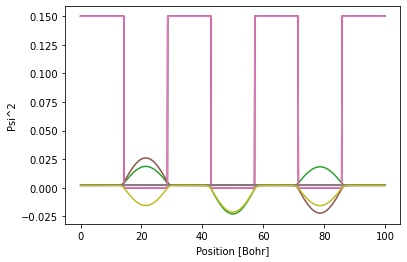

In [4]:
import numpy as np 
import math
import matplotlib.pyplot as plt

im = 1000 
rmin = 0
rmax = 100
nwells = 3
nstates = 3
nwells = 2*nwells + 1 
well_width = (rmax - rmin)/nwells
dr = (rmax - rmin)/im 
w = 0.15
harmonic_potential = False
k=0.06
particle_mass = 10
wfn_amp_scaling = 0.3
r = np.zeros(im)
V = np.zeros(im)

def potential_limits(probed_r_coordinate ,rmin, well_width, nwells, width_scaling, limits_type = 'nonzero_V'):
    wells_boundary_indices = [rmin + well_width*i for i in range(nwells+1)]
    if limits_type == 'nonzero_V':
        s_idx_V = list((1-width_scaling)*np.array(wells_boundary_indices[::2]))
        f_idx_V = list((1+width_scaling)*np.array(wells_boundary_indices[1::2]))
    if limits_type == 'zero_V':
        s_idx_V = list((1-width_scaling)*np.array(wells_boundary_indices[1::2]))
        f_idx_V = list((1+width_scaling)*np.array(wells_boundary_indices[2::2]))
    #s_idx_V =  [i*(1 - width_scaling) for i in s_idx_V]
    #f_idx_V =  [i*(1 + width_scaling) for i in f_idx_V]
    bool_list_length = len(f_idx_V)
    bool_list = [probed_r_coordinate >= s_idx_V[i] and probed_r_coordinate <= f_idx_V[i] for i in range(bool_list_length)]
    return np.any(bool_list)
    
    
for i in range(im):
    r[i] = i*dr + rmin
    if potential_limits(r[i] ,rmin, well_width, nwells, 0, 'zero_V'):
        V[i] = 0
    #else:
    if potential_limits(r[i] ,rmin, well_width, nwells, 0, 'nonzero_V'):
        if harmonic_potential:  
            V[i]=0.5*k*(r[i]-5)**2
        else:
            V[i] = w
            
mu = particle_mass
hbar = 1
gp = hbar**2/(2*mu*dr**2)
T = np.zeros((im,im))
Vh = np.zeros((im,im))
for i in range(im):
    for j in range(im):
        T[i,j] = (gp*math.pi**2)/3
        if i != j:
            T[i,j] = gp*(-1)**(i-j)*2/(i-j)**2
        if i == j:
            Vh[i,j] = V[i]
H = T + Vh
E, U = np.linalg.eigh(H)
for n in range(nstates):
    plt.plot(r, V)
    plt.plot([r[0],r[-1]],[E[n],E[n]])
    plt.plot(r,wfn_amp_scaling*U[:,n]+ E[n])
    plt.ylabel('Psi^2')
    plt.xlabel('Position [Bohr]')
    

# Interactive Code: Time-Dependent Tunneling

We can simulate the quantum mechanical tunneling of a wave packet across a square potential barrier using the Time-Dependent formulation of the Schrӧdinger Equation. This equation can be solved by the Finite-Difference Time-Domain (FDTD) Method. The particle is an electron represented by a 1D Gaussian wave function.

In [1]:
# Import Python modules

import numpy as np                   # Mathematical functions for Python
import matplotlib.pyplot as plt      # Plot functions for Python
import scipy.constants as constants  # Physical constants

%matplotlib notebook

In [2]:
# Define the Quantum Tunneling problem
## Define the Potential Energy Barrier and the Wave Function

V0 = 600   # Potential barrier height (eV)
bw = 0.25  # Potential barrier width (Angstrom)

ke = 500   # Electron kinetic energy (eV)
me = 1.0   # Electron mass

## Convert Unit System
V0 = V0 * constants.value('electron volt') # eV to J
ke = ke * constants.value('electron volt') # eV to J
bw = bw * constants.value('Angstrom star') # A to Meters
me = me * constants.m_e                    # Electron Mass in Kg

# Numerical definition of the Wave Function
## Initial Wave Vector
k0 = np.sqrt(2 * ke * me / (constants.hbar ** 2))

# Initial velocity of the wave function
vel = constants.hbar * k0 / me

# Define simulation parameters for the Quantum Tunneling Simulation
## Initial spread of Gaussian Wave function
sig = 1.0 * constants.value('Angstrom star')  

## Define grid cell size
dx = np.minimum((bw / 25.0), (sig / 25.0))

## Define simulation domain
length = 40 * np.maximum(bw, sig)  # Simulation domain length
ll = int(length / dx)              # Total number of grid points in the domain
lx = np.linspace(0.0, length, ll)  # Initial position of the wave vector along x

## Simulation time step size
dt = 0.9 * constants.hbar / ((constants.hbar ** 2 / (me * dx ** 2)) + (V0 / 2.0))
tt = int(0.35 * length / vel / dt) # Total number of time steps in the simulation

# Numerical Definition of the Potential Energy Barrier
## Build potential energy array in the simulation domain
Vx = np.zeros(ll)

## Build potential energy barrier array
bwgrid = int(bw / (2.0 * dx))
bposgrid = int(ll / 2.0)
bl = bposgrid - bwgrid
br = bposgrid + bwgrid

## Include the potential energy barrier in the potential energy array
Vx[bl:br] = V0

# Numerical Definition of the Wave Function
## Build wave function arrays for real and imaginary parts and its magnitude
psi_real = np.zeros((ll))
psi_im   = np.zeros((ll))
psi_mag  = np.zeros(ll)

## Describe the wave function using a Gaussian function
### Define Gaussian parameters
ac = 1.0 / np.sqrt((np.sqrt(np.pi)) * sig)
x0 = bl * dx - 6 * sig

psi_gauss = ac * np.exp(-(lx - x0) ** 2 / (2.0 * sig ** 2))

### Build the wave function arrays replacing by the built Gaussian function
psi_real = psi_gauss * np.cos(k0 * lx)
psi_im   = psi_gauss * np.sin(k0 * lx)
psi_mag  = psi_real ** 2 + psi_im ** 2

<IPython.core.display.Javascript object>


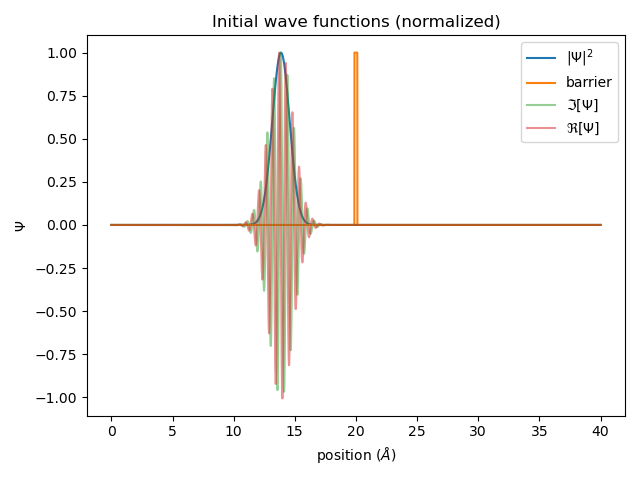

In [3]:
# Plot Initial Conditions

fig0 = plt.figure()
ax0 = fig0.add_subplot(111)
ax0.set_xlabel('position ($\AA$)')
ax0.set_ylabel('$\Psi$')
ax0.set_title('Initial wave functions (normalized)')
ax0.plot(lx / constants.value('Angstrom star'), psi_mag / np.amax(psi_mag), label='$|\Psi|^2$')
ax0.plot(lx / constants.value('Angstrom star'), Vx / np.amax(Vx), label='barrier')
ax0.plot(lx / constants.value('Angstrom star'), psi_im / np.amax(psi_im), label='$\Im[\Psi]$', alpha=0.5)
ax0.plot(lx / constants.value('Angstrom star'), psi_real / np.amax(psi_real), label='$\Re[\Psi]$', alpha=0.5)
ax0.legend()
fig0.tight_layout()
fig0.canvas.draw()
fig0.show()

<IPython.core.display.Javascript object>


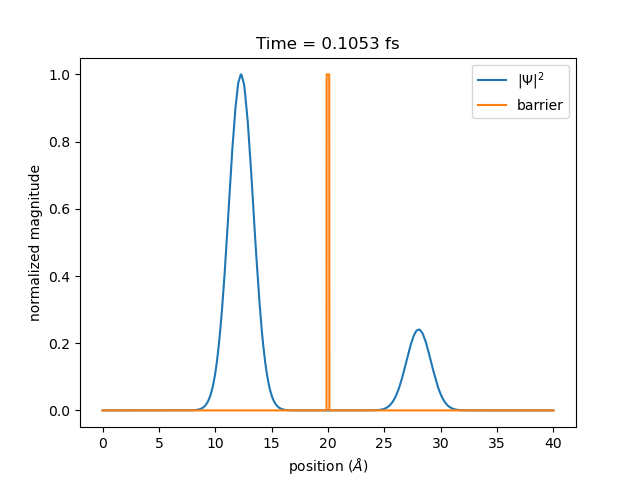

In [4]:
# Define Finite-Difference Time-Domain coefficients
c1 = constants.hbar * dt / (2.0 * constants.m_e * dx ** 2)
c2 = dt / constants.hbar

## Define Plot object for time steps
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.set_xlabel('position ($\AA$)')
ax1.set_ylabel('norm magnitude')
fig1.show()
fig1.canvas.draw()

## Calculate Wave Packet propagation by the Finite-Difference Time-Domain Method
for nn in range(0, tt):
    # Update FDTD Coefficients
    psi_im[1:ll - 1] = ( c1 * (psi_real[2:ll] - 2.0 * psi_real[1:ll - 1] + psi_real[0:ll - 2]) - c2 * Vx[1:ll - 1] * psi_real[1:ll - 1] + psi_im[1:ll - 1])
    psi_real[1:ll - 1] = (-c1 * (psi_im[2:ll] - 2.0 * psi_im[1:ll - 1] + psi_im[0:ll - 2]) + c2 * Vx[1:ll - 1] * psi_im[1:ll - 1] + psi_real[1:ll - 1])
    psi_mag = psi_real ** 2 + psi_im ** 2

    if nn % 50 == 0:
        # Update Plot
        tstr = 'Time = ' + str(round(nn * dt * 1e15, 4)) + ' fs'
        ax1.clear()
        ax1.plot(lx / constants.value('Angstrom star'), psi_mag / np.amax(psi_mag), label='$|\Psi|^2$')
        ax1.plot(lx / constants.value('Angstrom star'), Vx / np.amax(Vx), label='barrier')
        ax1.legend()
        ax1.set_title(tstr)
        ax1.set_xlabel('position ($\AA$)')
        ax1.set_ylabel('normalized magnitude')
        fig1.canvas.draw()


<IPython.core.display.Javascript object>


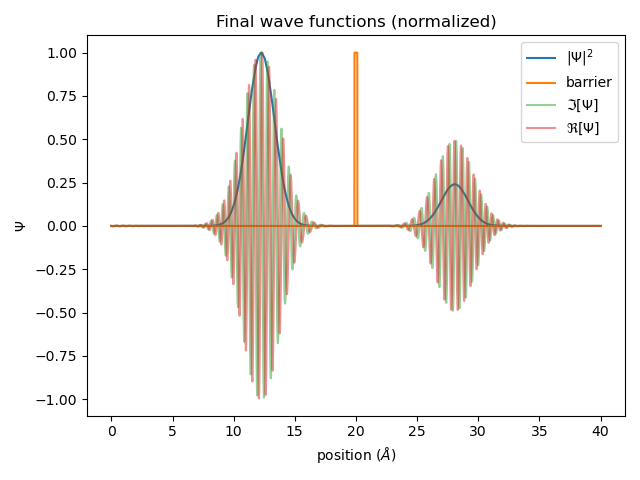

In [5]:
# Plot final wave function

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_xlabel('position ($\AA$)')
ax2.set_ylabel('$\Psi$')
ax2.set_title('Final wave functions (normalized)')
ax2.plot(lx / constants.value('Angstrom star'), psi_mag / np.amax(psi_mag), label='$|\Psi|^2$')
ax2.plot(lx / constants.value('Angstrom star'), Vx / np.amax(Vx), label='barrier')
ax2.plot(lx / constants.value('Angstrom star'), psi_im / np.amax(psi_im), label='$\Im[\Psi]$', alpha=0.5)
ax2.plot(lx / constants.value('Angstrom star'), psi_real / np.amax(psi_real), label='$\Re[\Psi]$', alpha=0.5)
ax2.legend()
fig2.show()
fig2.tight_layout()
fig2.canvas.draw()

## Exploring Time-Dependent Tunneling Simulations

The procedure previously applied can be easilty repeated by using a function called ```run_quantum_tunneling_simulation(V0, bw, ke, me, sig)```, where:
- ```V0```: Potential barrier height (eV)
- ```bw```: Potential barrier width (Angstrom)
- ```ke```: Wave packet kinetic energy (eV)
- ```me```: Wave packet mass (a.u.)
- ```sig```: Wave packet spread (Angstrom)

In [6]:
from quantum_tunneling import run_quantum_tunneling_simulation

### Effect of the Potential Energy Barrier Width

Let's increase the Potential barrier width to 1.0 Angstrom (4 times in comparison to the first example).


Potential barrier =  600.0 eV
Potential barrier width =  1.0 A
(The boundary of the simulation domain is assumed to be an infinite barrier)
Wave packet energy =  500.0 eV
Wave packet spread =  1.0 A

Grid size =  4.00e-02 A
Time step =  1.17e-04 fs


<IPython.core.display.Javascript object>


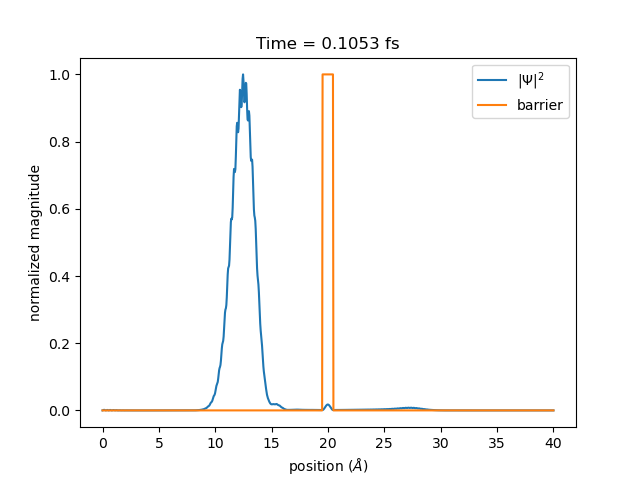

In [7]:
sim_initial, sim_final = run_quantum_tunneling_simulation(600, 1.0, 500, 1.0)

Comparing the final wave function, it's possible to notice the decreasement of the wave function.

<IPython.core.display.Javascript object>


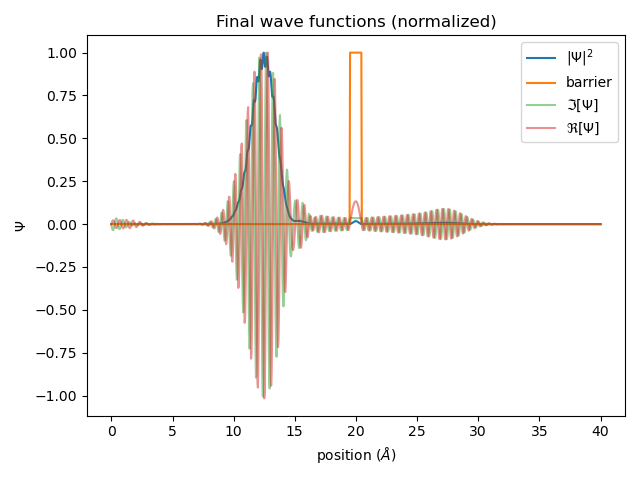

In [8]:
sim_final.show()

### Effect of the Initial Kinetic Energy

We can also try to investigate the effect of the kinetic energy of the wave packet. We decrease its energy to 250 eV (half of the first example).


Potential barrier =  600.0 eV
Potential barrier width =  0.25 A
(The boundary of the simulation domain is assumed to be an infinite barrier)
Wave packet energy =  250.0 eV
Wave packet spread =  1.0 A

Grid size =  1.00e-02 A
Time step =  7.74e-06 fs


<IPython.core.display.Javascript object>


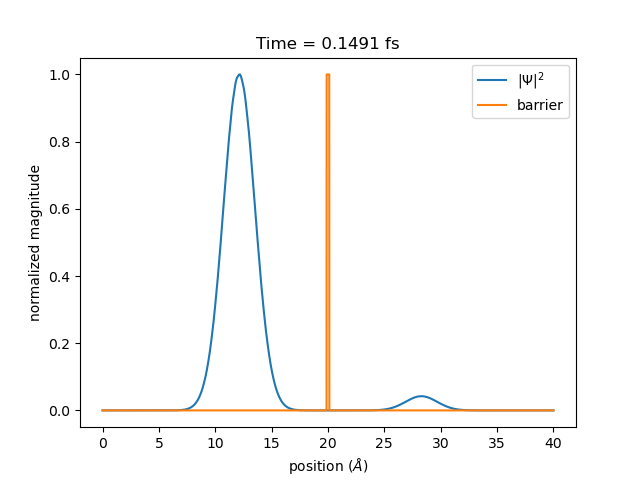

In [9]:
sim_initial, sim_final = run_quantum_tunneling_simulation(600, 0.25, 250, 1.0)

### Effect of the Wave Packet Mass

To finish, we can try to investigate the effect of the mass of the wave packet. We increase the mass by 10 times of the electron mass.


Potential barrier =  600.0 eV
Potential barrier width =  0.25 A
(The boundary of the simulation domain is assumed to be an infinite barrier)
Wave packet energy =  500.0 eV
Wave packet spread =  1.0 A

Grid size =  1.00e-02 A
Time step =  7.48e-05 fs


<IPython.core.display.Javascript object>


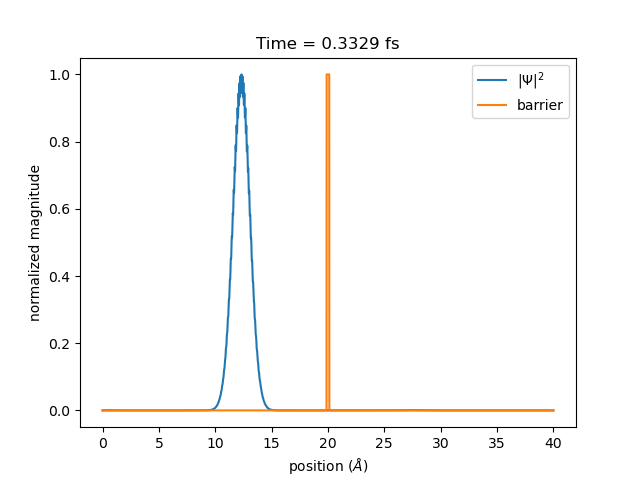

In [10]:
sim_initial, sim_final = run_quantum_tunneling_simulation(600, 0.25, 500, 10.0)

It's possible to notice that the quantum tunneling is almost absent in this case. To illustrate the importance of the mass of the wave packet, we can rationalize that the mass of one proton is 1836 times the electron mass. As consequence, the tunneling rates of small atoms are considerably small but still can be unique conditions for special chemical reactions.

<IPython.core.display.Javascript object>


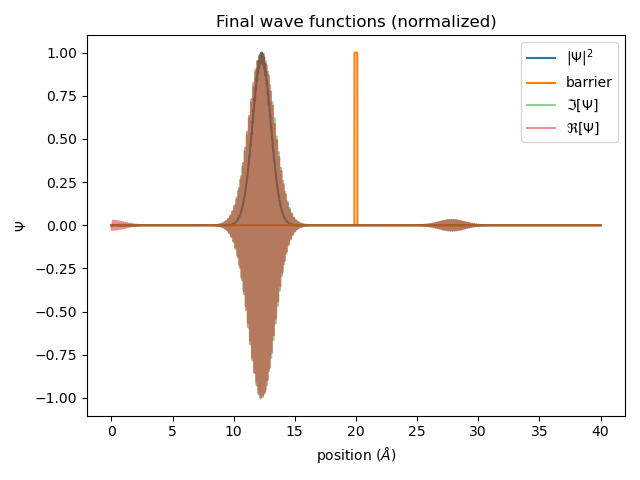

In [11]:
sim_final.show()

# Technological Applications of the Tunneling Phenomenon
## Scanning Tunneling Microscopy (STM)

The scanning tunneling microscope (STM) is microscope for imaging surfaces at the atomic level based on the electronic tunneling.

A needle of platinum–rhodium or tungsten is applied to scan across a conducting surface. When the tip of the needle come close to the surface, the electrons can tunnel between them. The tunneling establish an electronic current between the two conductors, which can be measured and processed by the electronic and computational system. The data processing of this signals can build the microscopic images.

The most particular feature of the STM in comparison with other microscopy techniques is the manipulation and imaging in the small scale of individual atoms. It can be done by its extremely sharp tip, smaller than $0.1 nm$, which is the order of magnitude of the chemical bonds.

As we saw previously, the tunnelling probability is very sensitive to the size of the gap (the potential barrier), and the microscope can detect tiny, atom-scale variations in the height of the surface.

| <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Scanning_Tunneling_Microscope_schematic.svg/561px-Scanning_Tunneling_Microscope_schematic.svg.png" width="500"> |
|:--:|
| *Schematic view of an Scanning Tunneling Microscope.[<sup>2</sup>](#fn2)* |

The development of this technique by Gerd Binnig and Heinrich Rohrer was honored with the Nobel Prize in Physics in 1986.

### A Boy and His Atom: The World's Smallest Movie

In 2013, IBM researchers used a Scanning Tunneling Microscope to move thousands of carbon monoxide molecules in a copper plate to make a movie. The same scanning technique was applied to obtain the images magnified 100 million times. A movie made with atoms.

"A Boy and His Atom" holds the Guinness World Records™ record for the World's Smallest Stop-Motion Film.

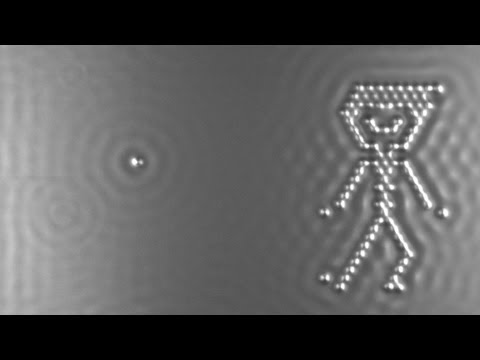

In [15]:
from IPython.display import YouTubeVideo

YouTubeVideo("https://www.youtube.com/watch?v=oSCX78-8-q0".split("=")[-1], width=800, height=600)

<span id="fn1"> [1] Adapted from [OpenStax University Physics](https://phys.libretexts.org/Bookshelves/University_Physics/Book%3A_University_Physics_(OpenStax)/Book%3A_University_Physics_III_-_Optics_and_Modern_Physics_(OpenStax)/07%3A_Quantum_Mechanics/7.07%3A_Quantum_Tunneling_of_Particles_through_Potential_Barriers). Distributed under [Creative Commons Attribution License (by 4.0)](http://creativecommons.org/licenses/by/4.0/).</span>

<span id="fn2"> [2] Obtained from [Wikipedia](https://en.wikipedia.org/wiki/Scanning_tunneling_microscope). Distributed under [Creative Commons Attribution License (by 2.0)](https://creativecommons.org/licenses/by-sa/2.0/at/deed.en).</span>